In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from tensorflow.keras.datasets import cifar10

In [38]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [39]:
x_train.shape


(50000, 32, 32, 3)

In [40]:
x_train[0].shape

(32, 32, 3)

In [41]:
single_image = x_train[0]

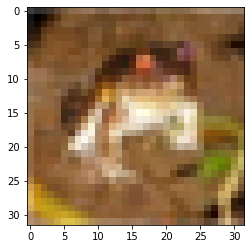

In [42]:
plt.imshow(single_image)

In [43]:
x_train = x_train/255

In [44]:
x_test = x_test/255

In [45]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [49]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor = "val_loss", patience=2)

In [53]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4992 - accuracy: 0.4557 - val_loss: 1.3014 - val_accuracy: 0.5306
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1666 - accuracy: 0.5867 - val_loss: 1.1390 - val_accuracy: 0.5984
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0244 - accuracy: 0.6397 - val_loss: 1.0106 - val_accuracy: 0.6479
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9106 - accuracy: 0.6785 - val_loss: 0.9706 - val_accuracy: 0.6593
Epoch 5/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8139 - accuracy: 0.7133 - val_loss: 0.9711 - val_accuracy: 0.6635
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7354 - accuracy: 0.7427 - val_loss: 0.9214 - val_accuracy: 0.6894
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6612 - accuracy: 0.7700 - val_loss: 0.9613 -

In [59]:
metrics = pd.DataFrame(model.history.history)

In [60]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

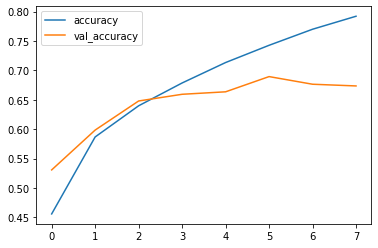

In [61]:
metrics[["accuracy","val_accuracy"]].plot()

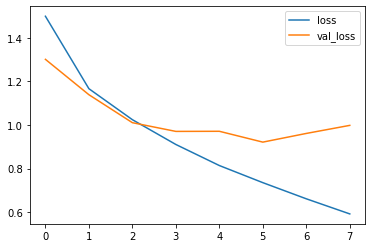

In [62]:
metrics[["loss","val_loss"]].plot()

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69      1000
           1       0.78      0.82      0.80      1000
           2       0.52      0.66      0.58      1000
           3       0.46      0.58      0.52      1000
           4       0.65      0.60      0.63      1000
           5       0.62      0.52      0.56      1000
           6       0.73      0.76      0.75      1000
           7       0.79      0.66      0.72      1000
           8       0.73      0.82      0.77      1000
           9       0.77      0.71      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



In [67]:
print(confusion_matrix(y_test,pred))

[[593  41  96  28  26   8  12  14 142  40]
 [ 14 820   9   9   6   6  13   6  47  70]
 [ 27   4 664  79  71  50  62  19  12  12]
 [ 10   9  91 583  59 129  60  27  17  15]
 [  8   4 126  85 603  33  74  48  14   5]
 [  6   4  99 246  42 517  31  37   4  14]
 [  2   8  76  90  24  19 762   7   9   3]
 [  6   5  58  80  85  63   5 664   5  29]
 [ 34  33  33  28   9   4   8   5 823  23]
 [ 13 129  24  33   4  11  10  10  60 706]]


In [68]:
my_image = x_test[0]

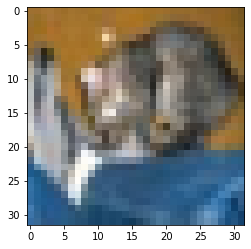

In [69]:
plt.imshow(my_image)

In [70]:
y_test[0]

array([3], dtype=uint8)

In [71]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)